# What is this Notebook about?


The of it is to implement the content of the blogpost https://vinicius-grijo.github.io/posts/what_is_a_fractional_integral/

That is, given $\alpha>0$, the $\alpha$-th primitive of $f$ is calculated according to the formula
$$
f_{\alpha}(x) := \frac{1}{\Gamma(\alpha)} \int_0^{x} (x - s)^{\alpha-1} f_0(s) ds.
$$

# The Setup

In [ ]:
pip install scienceplots

In [ ]:
import numpy as np
import scipy
import math
from scipy.integrate import quad
from scipy.special import gamma
import matplotlib.pyplot as plt
import scienceplots
plt.style.use([ 'notebook', 'grid','bright'])

# Defining the Necessary Functions

The first function to be defined is **frac_int**.

This function calculates the $\alpha$-th fractional integral of the function $f$ in the $[a,b]$ interval.

It returns the value of the integral.

In [ ]:
def frac_int(f, a=0, b=1, alpha=1):
  if alpha > 0:
    integrand = lambda s: (b-s)**(alpha-1)*f(s)/gamma(alpha)
    result, error = quad( integrand, a, b)
  return result

Now that one can compute a fractional integral, the **primitive** function is defined.

This function computes de $\alpha$-th order primitive of $f$ in the interval $[a,b]$.

The **primitive** function also takes a *step* argument, which characterizes for which values the $\alpha$-th primitive of $f$ will be computed.

Finally, it returns a grid and the values $f_{\alpha}$ takes on it.

In [ ]:
def primitive(f, grid, alpha):
  integral = np.array( [] )
  for x in grid:
    integral = np.append( integral, [ frac_int( f=f, a=grid[0], b=x, alpha=alpha) ] )
  return integral

The following function is simply a plot function used to compare different values of $\alpha>0$.

In [ ]:
def integrate(f, a=0, b=1, step=0.01, alpha_1=1, alpha_2=1.5, alpha_3=2):
  grid = np.arange(a,b+step, step)

  f_0 = np.array( [] )
  for x in grid:
    f_0 = np.append( f_0, [f(x)] )

  f_alpha_1 = primitive( f=f, grid=grid, alpha=alpha_1)
  f_alpha_2 = primitive( f=f, grid=grid, alpha=alpha_2)
  f_alpha_3 = primitive( f=f, grid=grid, alpha=alpha_3)

  fig = plt.figure( figsize=(30,10) )
  plt.plot(grid, f_0, label='function')
  plt.plot(grid, f_alpha_1, label=f'alpha={alpha_1}')
  plt.plot(grid, f_alpha_2, label=f'alpha={alpha_2}')
  plt.plot(grid, f_alpha_3, label=f'alpha={alpha_3}')
  plt.legend()
  plt.show()

# Examples

## First Example

$$
f(x) = x
$$

In [ ]:
def f(x):
  return x

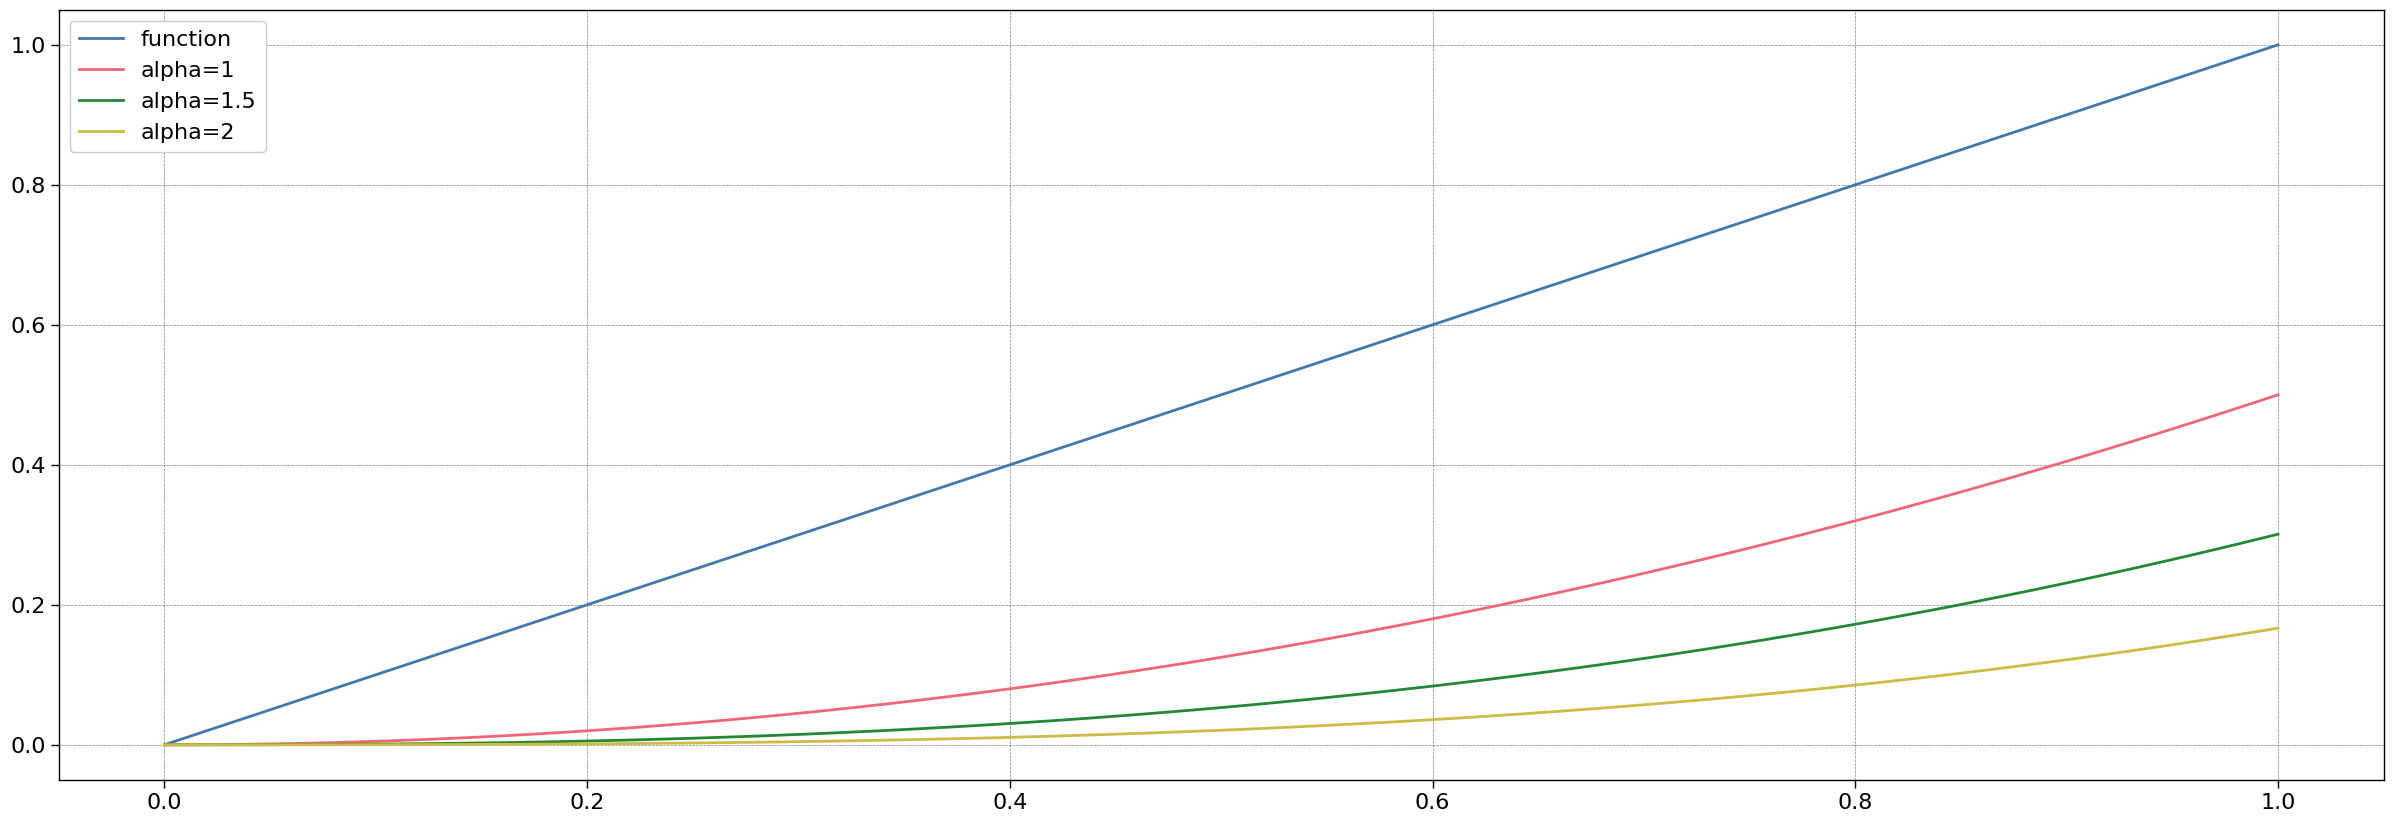

In [ ]:
integrate(f=f)

## Second Example

$$
g(x) = \cos(2\pi x)
$$

In [ ]:
def g(x):
  return math.cos( 2*math.pi*x )

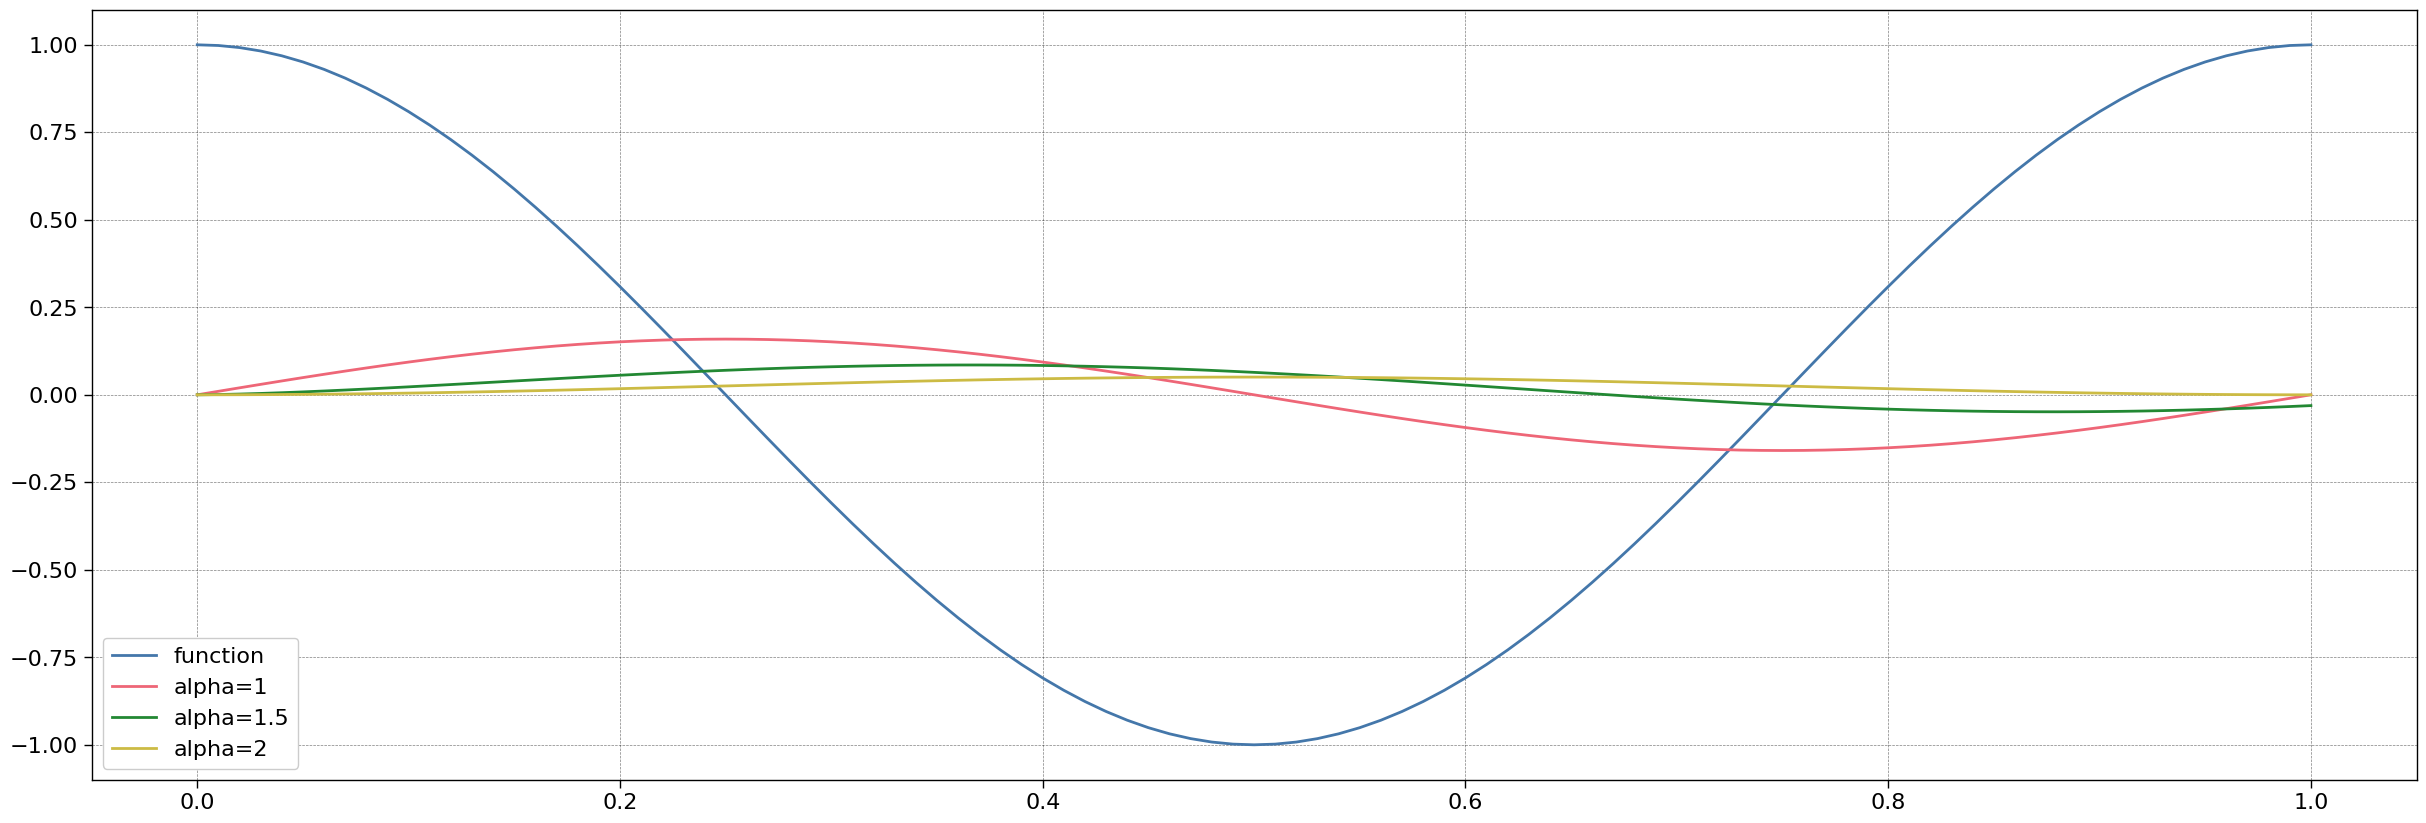

In [ ]:
integrate(g)

## Third Example

$$
h(x) = \sqrt{\frac{2}{\pi}}\exp{\Big(\frac{-x^2}{2}\Big)}
$$

In [ ]:
def h(x):
  return np.exp(-x**2/2)*np.sqrt(2)/np.sqrt(math.pi)

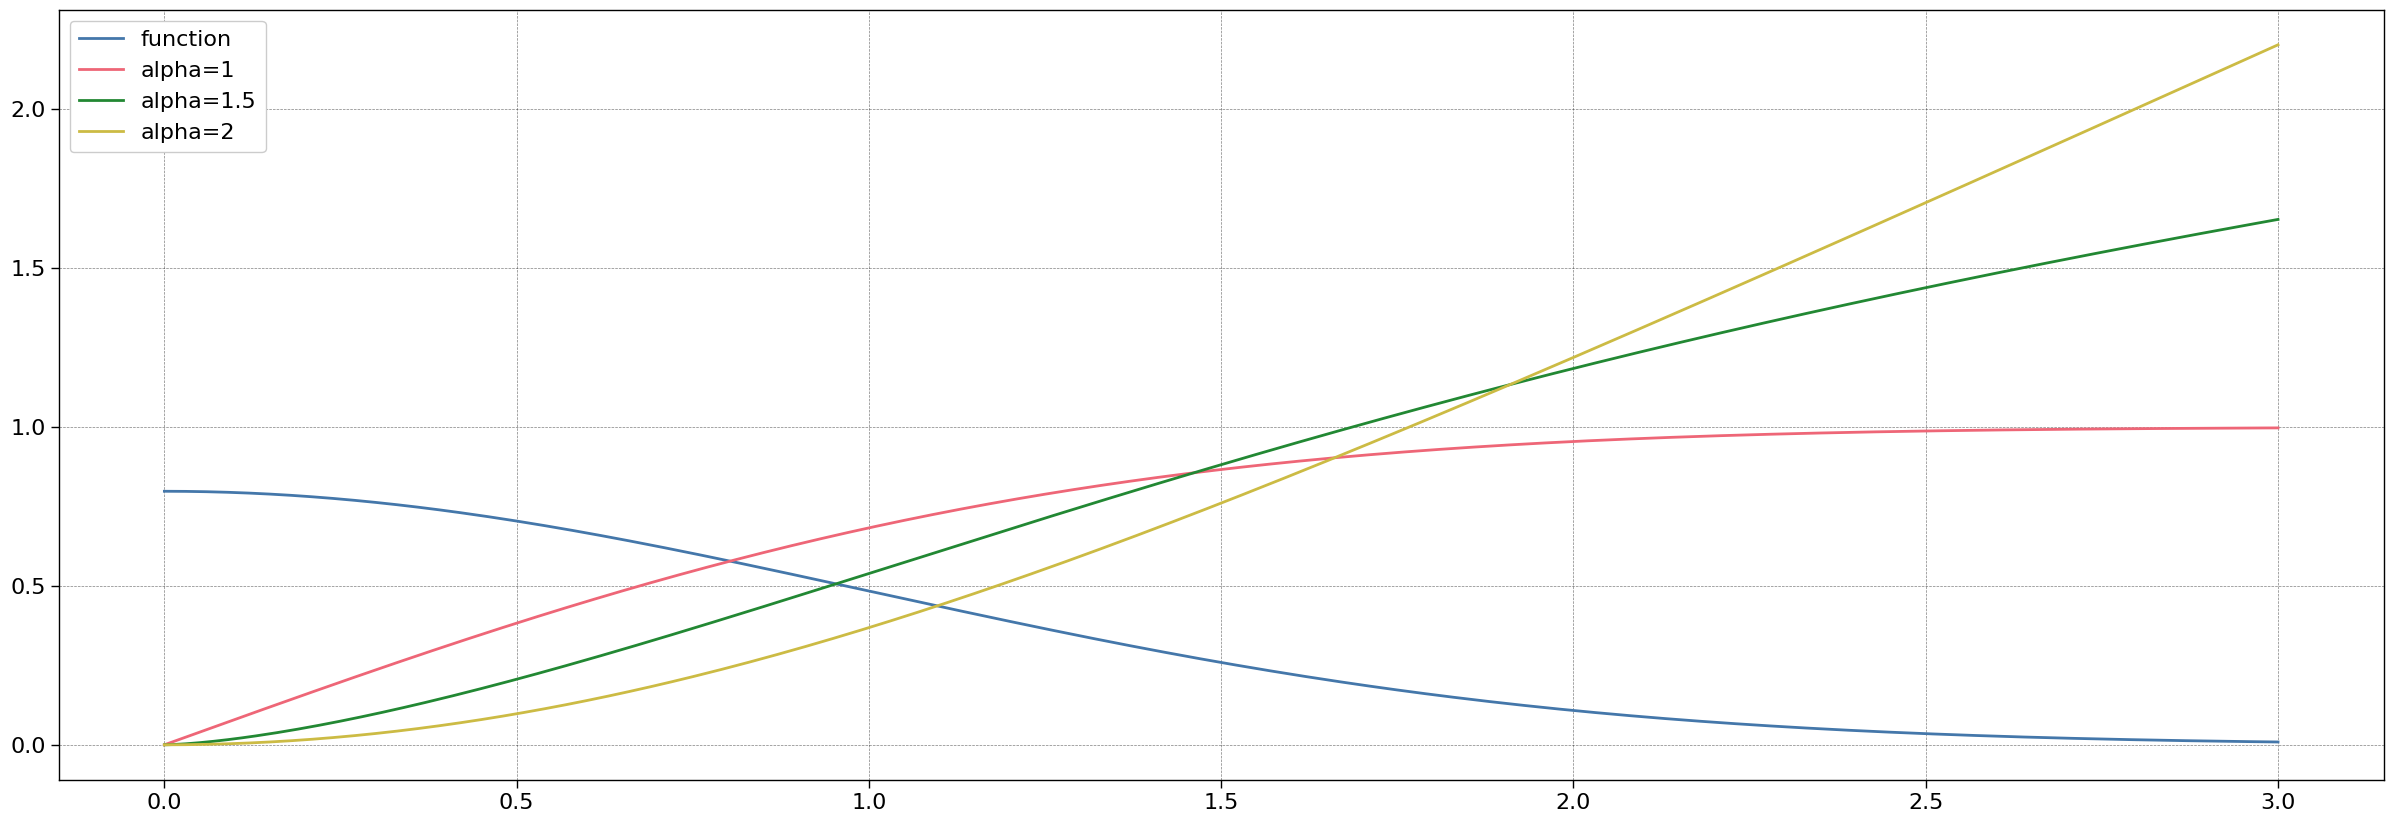

In [ ]:
integrate(h,a=0,b=3)